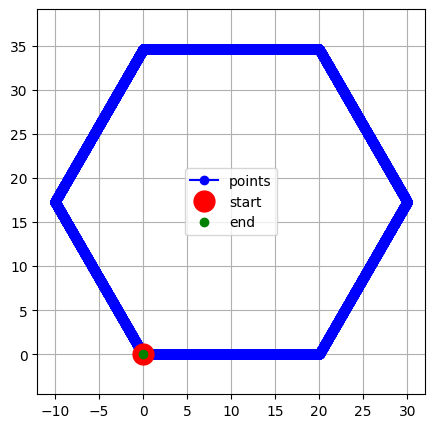

Финальное испытание завершено!
Финальная позиция: (4.961229344013773e-12, 1.7738865931704595e-12)


In [67]:
import math
import matplotlib.pyplot as plt


class Robot:
    
    def __init__(self, name):
        self.name = name
        self.x = 0
        self.y = 0
        self.dt = 0.001
        self.direction = 0
        self.speed = 0
        self.angular_speed = 0
        self.history = [(0, 0)]
    
    def get_position(self):
        return self.x, self.y
    
    def get_direction(self):
        return self.direction
    
    def get_speed(self):
        return self.speed

    def get_angular_speed(self):
        return self.angular_speed
    
    def set_direction(self, new_direction):
        self.direction = new_direction % 360
    
    def set_speed(self, new_speed):
        self.speed = max(0, min(new_speed, 100))

    def set_angular_speed(self, new_angular_speed):
        self.angular_speed = max(-180, min(new_angular_speed, 180))

    def info(self):
        return f"{self.name}: позиция {self.x, self.y} направление {self.direction} скорость {self.speed}"

    def move_forward(self, distance):
        direction_radians = math.radians(self.direction)
        self.x += distance * math.cos(direction_radians)
        self.y += distance * math.sin(direction_radians)
        self.history.append((self.x, self.y))

    def turn(self, angle):
        self.direction += angle
        self.direction %= 360

    def draw_square(self, side_length):
        for i in range(4):
            self.move_forward(side_length)
            self.turn(90)
            print(f"После {i+1}-й стороны: {self.get_position()}")

    def update(self):
        turn_angle = self.angular_speed * self.dt
        distance_per_update = self.speed * self.dt
        self.turn(turn_angle)
        self.move_forward(distance_per_update)

    def simulate(self, duration):
        N = int (duration / self.dt)
        for i in range(N):
            self.update()
    
    def draw_path(self):
        if len(self.history) <= 1:
            print("График невозможно создать")
        else:
            x_coords = [pos[0] for pos in self.history]
            y_coords = [pos[1] for pos in self.history]
            plt.figure(figsize=(5, 5))
            plt.plot(x_coords, y_coords, 'b-o', label='points')
            plt.plot(x_coords[0], y_coords[0], 'ro', label='start', markersize=15)
            plt.plot(x_coords[-1], y_coords[-1], 'go', label='end')
            plt.grid(True)
            plt.legend()
            plt.axis('equal')
            plt.show()
        pass
    
    def move_in_circle(self, radius, period):
        distance = 2*radius*math.pi
        speed = distance/period
        angular_speed = 360/period
        self.set_speed(speed)
        self.set_angular_speed(angular_speed)
        self.simulate(period)

    def draw_ugolnick(self, n_sides=5, side_length=20, move_speed=10, turn_angular_speed=60):
        turn_angle = 360 / n_sides
        t_move = side_length / move_speed
        t_turn = turn_angle / turn_angular_speed
        for _ in range(n_sides):
    # Движение
            self.set_speed(move_speed)
            self.set_angular_speed(0)
            self.simulate(t_move)
    
    # Поворот
            self.set_speed(0)
            self.set_angular_speed(turn_angular_speed)
            self.simulate(t_turn)

        self.set_speed(0)
        self.set_angular_speed(0)
        self.draw_path()
# Финальный скрипт здесь

# 1. Создаем робота
final_robot = Robot("Чемпион")


# 6. Визуализация

final_robot.draw_ugolnick(6)
print("Финальное испытание завершено!")
print(f"Финальная позиция: {final_robot.get_position()}")
